In [2]:
from kan import *
torch.set_default_dtype(torch.float64)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

# create a KAN: 2D inputs, 1D output, and 5 hidden neurons. cubic spline (k=3), 5 grid intervals (grid=5).
model = KAN(width=[2,5,1], grid=3, k=3, seed=42, device=device)

cpu
checkpoint directory created: ./model
saving model version 0.0


In [3]:
from kan.utils import create_dataset

In [4]:
f = lambda x: torch.exp(torch.sin(torch.pi*x[:,[0]]) + x[:,[1]]**2)
dataset = create_dataset(f, n_var=2, device=device)
dataset['train_input'].shape, dataset['train_label'].shape

(torch.Size([1000, 2]), torch.Size([1000, 1]))

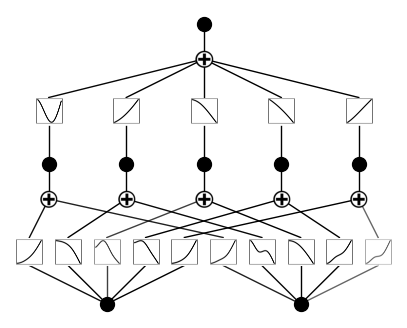

In [5]:
model(dataset['train_input'])
model.plot()

In [6]:
model.fit(dataset, opt="LBFGS", steps=50, lamb=0.001);

| train_loss: 2.04e-02 | test_loss: 2.01e-02 | reg: 5.70e+00 | : 100%|█| 50/50 [00:42<00:00,  1.18it

saving model version 0.1


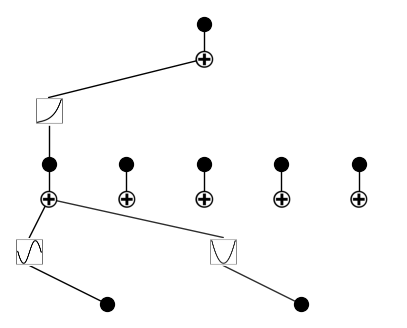

In [7]:
model.plot()

saving model version 0.2


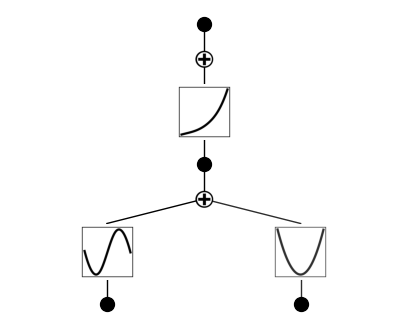

In [8]:
model = model.prune()
model.plot()

In [9]:
model.fit(dataset, opt="Adam", steps=500);

| train_loss: 5.53e-02 | test_loss: 5.40e-02 | reg: 1.34e+01 | : 100%|█| 500/500 [00:06<00:00, 75.96


saving model version 0.3


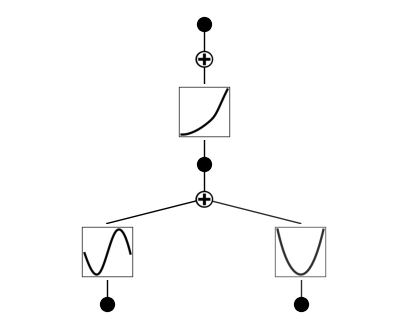

In [10]:
model.plot()

In [11]:
model = model.refine(10)

saving model version 0.4


In [12]:
model.fit(dataset, opt="LBFGS", steps=50);

| train_loss: 6.28e-04 | test_loss: 6.47e-04 | reg: 1.27e+01 | : 100%|█| 50/50 [00:08<00:00,  5.64it


saving model version 0.5


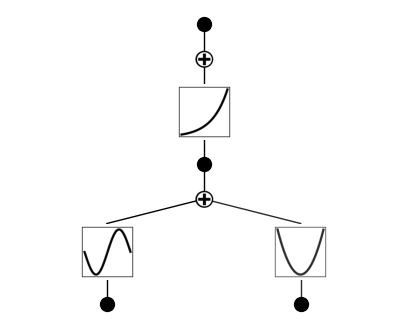

In [13]:
model.plot()

In [18]:
mode = "auto" # "manual"

if mode == "manual":
    # manual mode
    model.fix_symbolic(0,0,0,'sin');
    model.fix_symbolic(0,1,0,'x^2');
    model.fix_symbolic(1,0,0,'exp');
elif mode == "auto":
    # automatic mode
    lib = ['x','x^2','x^3','x^4','exp','log','sqrt','tanh','sin','abs']
    model.auto_symbolic(lib=lib)

skipping (0,0,0) since already symbolic
skipping (0,1,0) since already symbolic
skipping (1,0,0) since already symbolic
saving model version 0.8


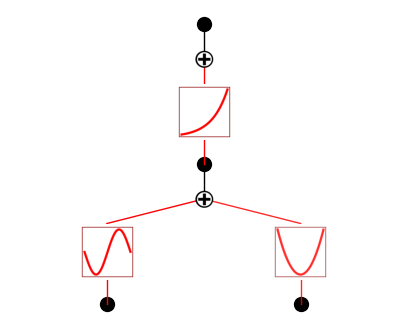

In [19]:
model.plot()

In [16]:
model.fit(dataset, opt="LBFGS", steps=50);

| train_loss: 1.47e-09 | test_loss: 1.38e-09 | reg: 0.00e+00 | : 100%|█| 50/50 [00:02<00:00, 18.30it


saving model version 0.7


In [20]:
from kan.utils import ex_round

ex_round(model.symbolic_formula()[0][0],4)

1.0*exp(0.999215043417645*x_2**2 + 1.0*sin(3.1416*x_1))